<a href="https://colab.research.google.com/github/pullz6/Research_inspired_Self-Explaining-Neural-Networks-for-Business-Process-Monitoring/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from graphviz import Digraph
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("Helpdesk.csv")

In [ ]:
df.head()

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Value 2,2010-01-13 08:40:25+02:00,Assign seriousness,Value 2,Case3608,Variant 33,33,Fluxicon Disco
1,Take in charge ticket,complete,Value 2,2010-01-29 08:52:27+02:00,Take in charge ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
2,Resolve ticket,complete,Value 2,2010-01-29 08:52:34+02:00,Resolve ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
3,Closed,complete,Value 5,2010-02-13 08:52:48+02:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco
4,Closed,complete,Value 5,2010-02-13 08:52:48+02:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   concept:name          21348 non-null  object
 1   lifecycle:transition  21348 non-null  object
 2   org:resource          21348 non-null  object
 3   time:timestamp        21348 non-null  object
 4   Activity              21348 non-null  object
 5   Resource              21348 non-null  object
 6   case:concept:name     21348 non-null  object
 7   case:variant          21348 non-null  object
 8   case:variant-index    21348 non-null  int64 
 9   case:creator          21348 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.6+ MB


In [ ]:
df['time:timestamp'] = df['time:timestamp'].str[:10]

In [ ]:
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'],dayfirst= True, format='mixed')

In [ ]:
df.head()

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Value 2,2010-01-13,Assign seriousness,Value 2,Case3608,Variant 33,33,Fluxicon Disco
1,Take in charge ticket,complete,Value 2,2010-01-29,Take in charge ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
2,Resolve ticket,complete,Value 2,2010-01-29,Resolve ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
3,Closed,complete,Value 5,2010-02-13,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco
4,Closed,complete,Value 5,2010-02-13,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco


In [20]:
df['concept:name'].unique()

array(['Assign seriousness', 'Take in charge ticket', 'Resolve ticket',
       'Closed', 'Wait', 'Create SW anomaly', 'Insert ticket',
       'Schedule intervention', 'RESOLVED', 'INVALID', 'VERIFIED',
       'Resolve SW anomaly', 'Require upgrade', 'DUPLICATE'], dtype=object)

In [21]:
#Checking if we can concept:name and activity is the same, so that we can delete this feild.
df['Checker'] = (df['concept:name'] == df['Activity'])

In [22]:
#Let's see if it all the same, if True.
df['Checker'].unique()

array([ True])

In [23]:
#Lets drop it since it is the same
df.drop('concept:name',axis=1, inplace=True)

In [18]:
pivot = pd.pivot_table(df,
                       values=['org:resource', 'case:variant'],
                       index='case:concept:name',
                       columns='Activity',
                       aggfunc='count')

In [19]:
pivot

case:variant                                     \
Activity          Assign seriousness Closed Create SW anomaly DUPLICATE   
case:concept:name                                                         
Case1                            1.0    1.0               NaN       NaN   
Case10                           1.0    1.0               NaN       NaN   
Case100                          1.0    1.0               NaN       NaN   
Case1000                         2.0    1.0               NaN       NaN   
Case1001                         1.0    1.0               NaN       NaN   
...                              ...    ...               ...       ...   
Case995                          1.0    1.0               NaN       NaN   
Case996                          1.0    1.0               NaN       NaN   
Case997                          1.0    1.0               NaN       NaN   
Case998                          1.0    1.0               NaN       NaN   
Case999                          1.0    1.0               NaN       NaN   

                                                                  \
Activity          INVALID Insert ticket RESOLVED Require upgrade   
case:concept:name                                                  
Case1                 NaN           NaN      NaN             NaN   
Case10                NaN           NaN      NaN             NaN   
Case100               NaN           NaN      NaN             1.0   
Case1000              NaN           NaN      NaN             NaN   
Case1001              NaN           NaN      NaN             NaN   
...                   ...           ...      ...             ...   
Case995               NaN           NaN      NaN             NaN   
Case996               NaN           NaN      NaN             NaN   
Case997               NaN           NaN      NaN             NaN   
Case998               NaN           NaN      NaN             NaN   
Case999               NaN           NaN      NaN             NaN   

                                                     ... org:resource  \
Activity          Resolve SW anomaly Resolve ticket  ...      INVALID   
case:concept:name                                    ...                
Case1                            NaN            1.0  ...          NaN   
Case10                           NaN            1.0  ...          NaN   
Case100                          NaN            1.0  ...          NaN   
Case1000                         NaN            1.0  ...          NaN   
Case1001                         NaN            1.0  ...          NaN   
...                              ...            ...  ...          ...   
Case995                          NaN            1.0  ...          NaN   
Case996                          NaN            1.0  ...          NaN   
Case997                          NaN            1.0  ...          NaN   
Case998                          NaN            1.0  ...          NaN   
Case999                          NaN            1.0  ...          NaN   

                                                                             \
Activity          Insert ticket RESOLVED Require upgrade Resolve SW anomaly   
case:concept:name                                                             
Case1                       NaN      NaN             NaN                NaN   
Case10                      NaN      NaN             NaN                NaN   
Case100                     NaN      NaN             1.0                NaN   
Case1000                    NaN      NaN             NaN                NaN   
Case1001                    NaN      NaN             NaN                NaN   
...                         ...      ...             ...                ...   
Case995                     NaN      NaN             NaN                NaN   
Case996                     NaN      NaN             NaN                NaN   
Case997                     NaN      NaN             NaN                NaN   
Case998                     NaN      NaN         

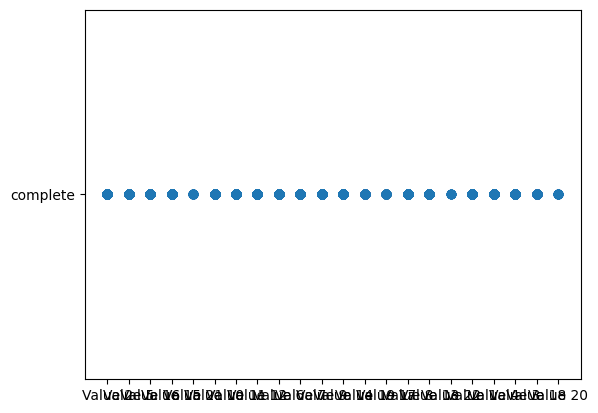

In [ ]:
plt.figure()
plt.scatter(df['Resource'],df['lifecycle:transition'])
plt.show()

In [ ]:
pivot = pd.pivot_table(df,
                       values=['Temperature', 'Humidity'],
                       index='Date',
                       columns='City',
                       aggfunc='mean')

In [ ]:
import pandas as pd

# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'City': ['New York', 'Chicago', 'New York', 'Chicago'],
    'Temperature': [32, 25, 30, 22],
    'Humidity': [80, 70, 75, 65]
}
df = pd.DataFrame(data)

# Create pivot table
pivot = pd.pivot_table(df,
                       values=['Temperature', 'Humidity'],
                       index='Date',
                       columns='City',
                       aggfunc='mean')

print(pivot)

           Humidity          Temperature         
City        Chicago New York     Chicago New York
Date                                             
2023-01-01     70.0     80.0        25.0     32.0
2023-01-02     65.0     75.0        22.0     30.0
